## HEALTHCARE MEDICAL CONDITION PREDICTION MODEL
—-----------------------------------------------------------------------------------------------------------

Name: Farisa Hameed

Organization: Entri Elevate


##  Overview of Problem Statement:
The objective is to build a predictive model to classify or predict test results based on patient data. This involves identifying key features impacting outcomes, preprocessing data, and training models like Logistic Regression, Random Forest, and Gradient Boosting. Evaluation will include metrics like accuracy, precision, recall, F1-Score. The goal is to achieve reliable predictions, derive clinical insights, and support better decision-making in healthcare. Key challenges include handling imbalanced data and ensuring model interpretability.

##  Objective:
To develop a predictive model that accurately classifies or predicts test results based on patient data and other related features in the dataset. The goal is to identify patterns in the features that correlate with specific outcomes, enabling healthcare professionals to make informed decisions and improve patient care.

## Data Description:
**Source:** Healthcare dataset provided.

**Features**


**Name:** Patient's name

**Age:** Patient's age

**Gender:** Patient's gender

**Blood Type:** Blood type of the patient

**Medical Condition:** Condition diagnosed

**Date of Admission:** When the patient was admitted

**Doctor:** Treating doctor's name

**Hospital:** Hospital name

**Insurance Provider:** Name of the insurance company

**Billing Amount:** Total cost of care

**Room Number:** Hospital room assigned

**Admission Type:** Type of admission (Urgent, Emergency, Elective)

**Discharge Date:** When the patient was discharged

**Medication:** Prescribed medication

**Test Results:** Results of medical tests (Normal, Abnormal, Inconclusive)(Tatrget)

## Importing Libraries and Loading Data

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import confusion_matrix
from sklearn.ensemble import BaggingClassifier

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score


from scipy.stats import uniform
from sklearn.pipeline import Pipeline

In [76]:
# Data Collection 
print("\nCollecting Data...")

In [77]:
data=pd.read_csv('healthcare_dataset.csv')
print("\nDataset Loaded....")



Dataset Loaded....


In [78]:
data.head(10)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal
5,EMILY JOHNSOn,36,Male,A+,Asthma,2023-12-20,Taylor Newton,Nunez-Humphrey,UnitedHealthcare,48145.110951,389,Urgent,2023-12-24,Ibuprofen,Normal
6,edwArD EDWaRDs,21,Female,AB-,Diabetes,2020-11-03,Kelly Olson,Group Middleton,Medicare,19580.872345,389,Emergency,2020-11-15,Paracetamol,Inconclusive
7,CHrisTInA MARtinez,20,Female,A+,Cancer,2021-12-28,Suzanne Thomas,"Powell Robinson and Valdez,",Cigna,45820.462722,277,Emergency,2022-01-07,Paracetamol,Inconclusive
8,JASmINe aGuIlaR,82,Male,AB+,Asthma,2020-07-01,Daniel Ferguson,Sons Rich and,Cigna,50119.222792,316,Elective,2020-07-14,Aspirin,Abnormal
9,ChRISTopher BerG,58,Female,AB-,Cancer,2021-05-23,Heather Day,Padilla-Walker,UnitedHealthcare,19784.631062,249,Elective,2021-06-22,Paracetamol,Inconclusive


In [79]:
data.tail()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
55495,eLIZABeTH jaCkSOn,42,Female,O+,Asthma,2020-08-16,Joshua Jarvis,Jones-Thompson,Blue Cross,2650.714952,417,Elective,2020-09-15,Penicillin,Abnormal
55496,KYle pEREz,61,Female,AB-,Obesity,2020-01-23,Taylor Sullivan,Tucker-Moyer,Cigna,31457.797307,316,Elective,2020-02-01,Aspirin,Normal
55497,HEATher WaNG,38,Female,B+,Hypertension,2020-07-13,Joe Jacobs DVM,"and Mahoney Johnson Vasquez,",UnitedHealthcare,27620.764717,347,Urgent,2020-08-10,Ibuprofen,Abnormal
55498,JENniFER JOneS,43,Male,O-,Arthritis,2019-05-25,Kimberly Curry,"Jackson Todd and Castro,",Medicare,32451.092358,321,Elective,2019-05-31,Ibuprofen,Abnormal
55499,jAMES GARCiA,53,Female,O+,Arthritis,2024-04-02,Dennis Warren,Henry Sons and,Aetna,4010.134172,448,Urgent,2024-04-29,Ibuprofen,Abnormal


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [81]:
data.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [82]:
# Check the shape of data
print(f'The Training Dataset has {data.shape[0]} rows and {data.shape[1]} columns.')

The Training Dataset has 55500 rows and 15 columns.


----------------------

## Data Cleaning and Handling Missing Values


In [85]:
# Find any missing values
data.isnull().sum()

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64

In [86]:
# Find any Duplicates
data.duplicated().sum()

534

In [87]:
# Remove Duplicates
data = data.drop_duplicates()

In [88]:
# Date of Admission and Discharge Date have dtype as object let's format it to datetime
for date in ['Date of Admission','Discharge Date']:
    data[date] = pd.to_datetime(data[date])
    
#calculate the no: of days patients got admitted in hospital
data['Days Hospitalized'] = (data['Discharge Date'] - data['Date of Admission']).dt.days
data['Days Hospitalized'] = data['Days Hospitalized'].astype(int)
data['Days Hospitalized']

0         2
1         6
2        15
3        30
4        20
         ..
55495    30
55496     9
55497    28
55498     6
55499    27
Name: Days Hospitalized, Length: 54966, dtype: int32

In [89]:
data.dtypes

Name                          object
Age                            int64
Gender                        object
Blood Type                    object
Medical Condition             object
Date of Admission     datetime64[ns]
Doctor                        object
Hospital                      object
Insurance Provider            object
Billing Amount               float64
Room Number                    int64
Admission Type                object
Discharge Date        datetime64[ns]
Medication                    object
Test Results                  object
Days Hospitalized              int32
dtype: object

In [90]:
# Get the cardinality of each column
cardinalities = data.nunique()

# Display cardinalities for all columns
print(cardinalities)

Name                  49992
Age                      77
Gender                    2
Blood Type                8
Medical Condition         6
Date of Admission      1827
Doctor                40341
Hospital              39876
Insurance Provider        5
Billing Amount        50000
Room Number             400
Admission Type            3
Discharge Date         1856
Medication                5
Test Results              3
Days Hospitalized        30
dtype: int64


In [91]:
# Remove irrelevant columns
data.drop(columns=['Name', 'Room Number','Doctor', 'Date of Admission','Discharge Date','Hospital' ], inplace=True)

In [92]:
# Check for class distribution
print(data['Medical Condition'].value_counts())

Medical Condition
Arthritis       9218
Diabetes        9216
Hypertension    9151
Obesity         9146
Cancer          9140
Asthma          9095
Name: count, dtype: int64


----------

## Exploratory Data Analysis (EDA)

In [95]:
# Identify Numerical columns
numerical_columns = data.select_dtypes(include=['float64', 'int64','int32']).columns
numerical_columns

Index(['Age', 'Billing Amount', 'Days Hospitalized'], dtype='object')

In [96]:
# # Identify Categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns
categorical_columns

Index(['Gender', 'Blood Type', 'Medical Condition', 'Insurance Provider',
       'Admission Type', 'Medication', 'Test Results'],
      dtype='object')

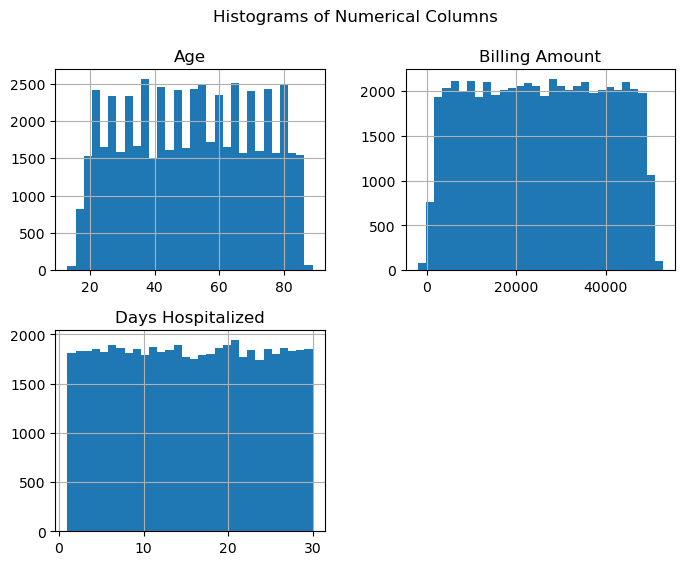

In [97]:
# Plot histograms for numerical columns
data[numerical_columns].hist(bins=30, figsize=(8, 6))
plt.suptitle('Histograms of Numerical Columns')
plt.show()

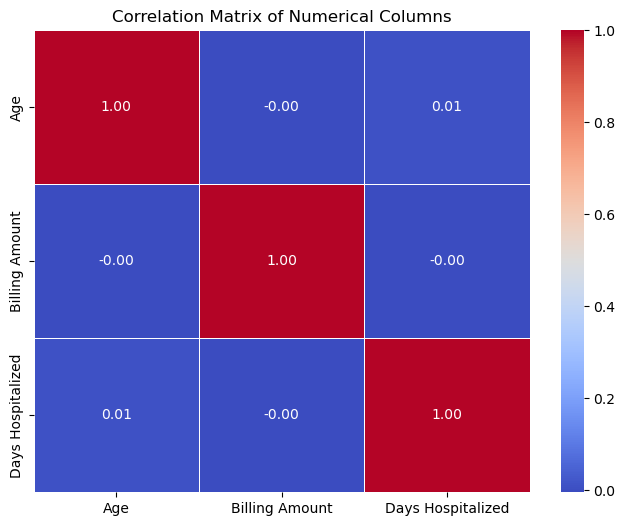

In [98]:
# Correlation heatmap to visualize relationships between numerical columns
corr_matrix = data[numerical_columns].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

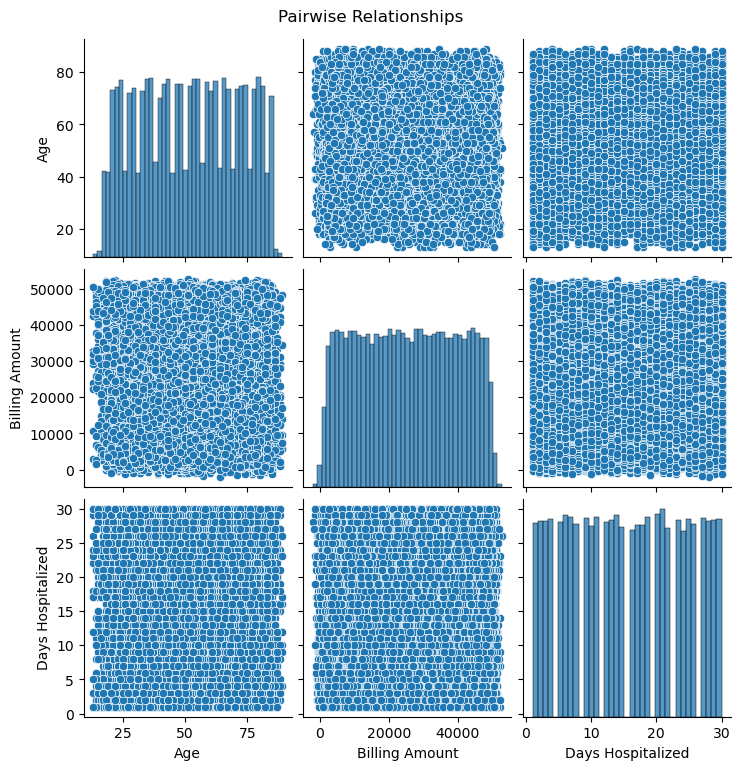

In [99]:
# Pair plot to visualize relationships between numerical columns
sns.pairplot(data[numerical_columns])
plt.suptitle('Pairwise Relationships', y=1.02)
plt.show()

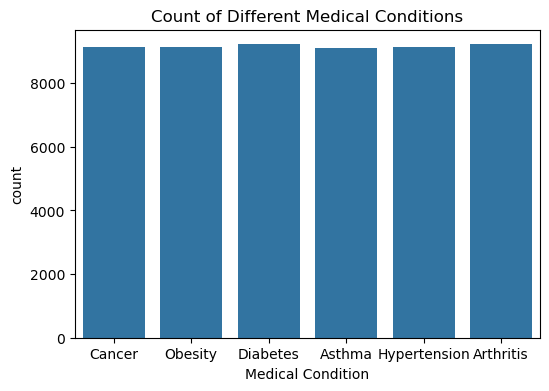

In [100]:
# Bar plot for categorical column (e.g., 'Medical Condition')
plt.figure(figsize=(6, 4))
sns.countplot(x='Medical Condition', data=data)
plt.title('Count of Different Medical Conditions')
plt.show()

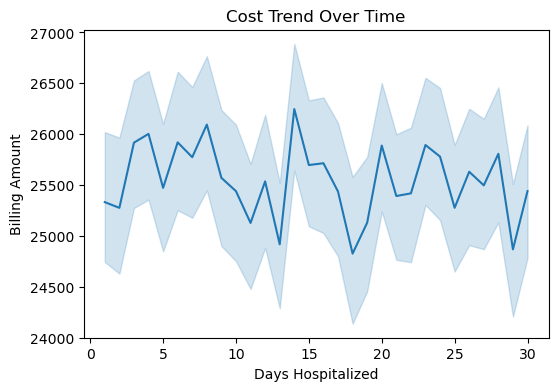

In [101]:
# Line plot for time-series data (if applicable, e.g., cost over time)
# For example, if there is a 'Date' column
plt.figure(figsize=(6, 4))
sns.lineplot(x='Days Hospitalized', y='Billing Amount', data=data)
plt.title('Cost Trend Over Time')
plt.show()

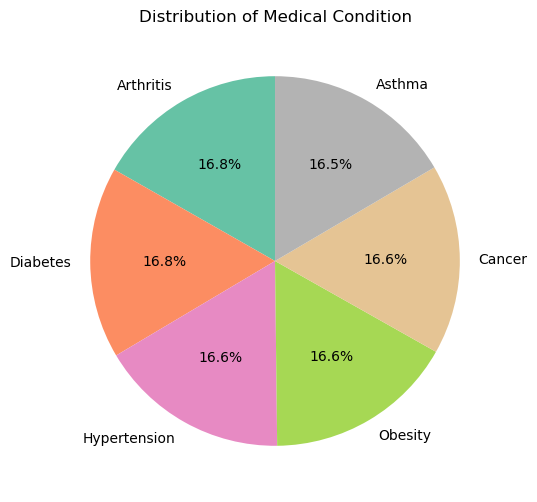

In [102]:
# Pie chart for categorical column (e.g., 'Medical Condition')
condition_counts = data['Medical Condition'].value_counts()
plt.figure(figsize=(8, 6))
condition_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set2')
plt.title('Distribution of Medical Condition')
plt.ylabel('')
plt.show()


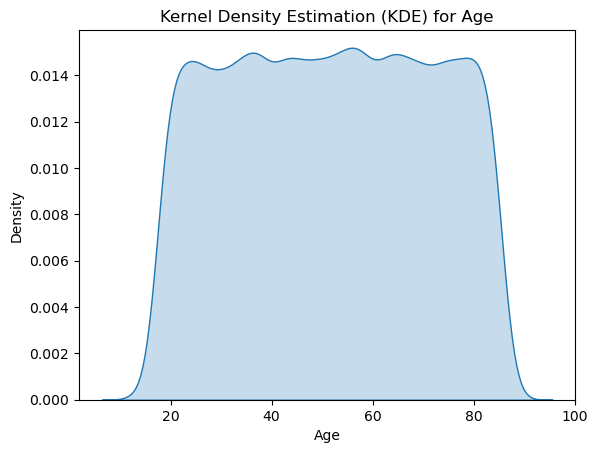

In [103]:
# KDE plot for a numerical column 
sns.kdeplot(data['Age'], fill=True)
plt.title('Kernel Density Estimation (KDE) for Age')
plt.show()

-----------

## Feature Engineering

In [106]:
# Identify categorical columns excluding 'Medical Condition'
categorical_columns = [col for col in categorical_columns if col not in 'Test Results']

# Apply one-hot encoding only to the other categorical columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Verify columns
print(data.columns)

Index(['Age', 'Billing Amount', 'Test Results', 'Days Hospitalized',
       'Gender_Male', 'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-',
       'Blood Type_B+', 'Blood Type_B-', 'Blood Type_O+', 'Blood Type_O-',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Diabetes', 'Medical Condition_Hypertension',
       'Medical Condition_Obesity', 'Insurance Provider_Blue Cross',
       'Insurance Provider_Cigna', 'Insurance Provider_Medicare',
       'Insurance Provider_UnitedHealthcare', 'Admission Type_Emergency',
       'Admission Type_Urgent', 'Medication_Ibuprofen', 'Medication_Lipitor',
       'Medication_Paracetamol', 'Medication_Penicillin'],
      dtype='object')


In [107]:
# Encode 'Medical Condition' and 'Hospital as numeric labels
label_encoder = LabelEncoder()
data['Test Results'] = label_encoder.fit_transform(data['Test Results'])



In [108]:
# Check unique classes mapped
print("Mapping of Test Results categories:")
print(dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))


Mapping of Test Results categories:
{'Abnormal': 0, 'Inconclusive': 1, 'Normal': 2}


In [109]:
# Check for Encoded data
data.head()

,Age,Billing Amount,Test Results,Days Hospitalized,Gender_Male,Blood Type_A-,Blood Type_AB+,Blood Type_AB-,Blood Type_B+,Blood Type_B-,...,Insurance Provider_Blue Cross,Insurance Provider_Cigna,Insurance Provider_Medicare,Insurance Provider_UnitedHealthcare,Admission Type_Emergency,Admission Type_Urgent,Medication_Ibuprofen,Medication_Lipitor,Medication_Paracetamol,Medication_Penicillin
0,30,18856.281306,2,2,True,False,False,False,False,True,...,True,False,False,False,False,True,False,False,True,False
1,62,33643.327287,1,6,True,False,False,False,False,False,...,False,False,True,False,True,False,True,False,False,False
2,76,27955.096079,2,15,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,28,37909.782410,0,30,False,False,False,False,False,False,...,False,False,True,False,False,False,True,False,False,False
4,43,14238.317814,0,20,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True


In [110]:
# Outliers

# Function to find outliers using IQR method

def find_outliers_iqr(df, columns):
    outliers = {}
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]
    
    return outliers

# Find outliers for all numerical columns
outliers = find_outliers_iqr(data, numerical_columns)

# Display outliers count for each column
print("Outliers in each numerical column:")
for col, count in outliers.items():
    print(f"{col}: {count} outliers")


Outliers in each numerical column:
Age: 0 outliers
Billing Amount: 0 outliers
Days Hospitalized: 0 outliers


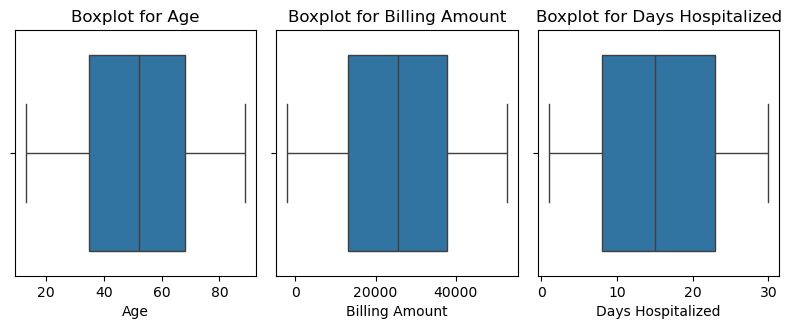

In [111]:
# Visualize outliers using boxplots

plt.figure(figsize=(8, 6))
for i, col in enumerate(numerical_columns):
    plt.subplot(2, 3, i+1)  # Adjust the subplot layout based on the number of numerical columns
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot for {col}')

plt.tight_layout()
plt.show()

In [112]:
# NO OUTLIERS FOUND

In [113]:
# Check the skewness of all numerical columns
skewness = data[numerical_columns].skew()
print("Skewness of Numerical olumns:")
print(skewness)

Skewness of Numerical olumns:
Age                 -0.005678
Billing Amount      -0.001304
Days Hospitalized    0.002833
dtype: float64


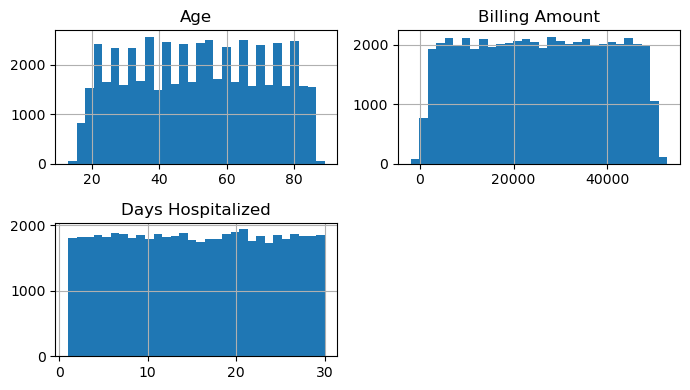

In [114]:
# Visualisation of skewness
data[['Age', 'Billing Amount', 'Days Hospitalized']].hist(bins=30, figsize=(7, 4))
plt.tight_layout()
plt.show()

In [115]:
# No transformation is needed for these columns based on skewness.

---------------

## Split Data into Training and Testing Sets

In [120]:
# Split data into features (x) and target (y)
a = data.drop('Test Results', axis=1)
b = data['Test Results']


In [124]:
# Handle imbalanced data using SMOTE

smote = SMOTE(random_state=42)
x, y = smote.fit_resample(a, b)

In [126]:
# split into Train and Test Sets

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

-----------

## Feature Selection

In [128]:
# Select top 15 features
selector = SelectKBest(score_func=f_classif,k=15)
selector.fit(x_train, y_train)

# Transform data to keep selected features
x_train_selected = selector.transform(x_train)
x_test_selected = selector.transform(x_test)

# Get the selected feature names
selected_features = x_train.columns[selector.get_support()]
print("Selected Features:", selected_features)


Selected Features: Index(['Age', 'Billing Amount', 'Days Hospitalized', 'Gender_Male',
       'Blood Type_A-', 'Blood Type_AB+', 'Blood Type_AB-', 'Blood Type_B+',
       'Medical Condition_Asthma', 'Medical Condition_Cancer',
       'Medical Condition_Hypertension', 'Medical Condition_Obesity',
       'Insurance Provider_Blue Cross', 'Insurance Provider_Cigna',
       'Insurance Provider_UnitedHealthcare', 'Admission Type_Urgent',
       'Medication_Ibuprofen', 'Medication_Lipitor', 'Medication_Paracetamol',
       'Medication_Penicillin'],
      dtype='object')


-------------------

## Feature Scaling 

In [162]:
# Scale the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_selected)
x_test_scaled = scaler.transform(x_test_selected)

In [132]:
print("Training set shape (features):", x_train_scaled.shape) 
print("Test set shape (features):", x_test_scaled.shape) 
print("Training set shape (target):", y_train.shape) 
print("Test set shape (target):", y_test.shape)

Training set shape (features): (44248, 20)
Test set shape (features): (11063, 20)
Training set shape (target): (44248,)
Test set shape (target): (11063,)


------------

## Model Building

In [152]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Classification': SVC(random_state=42)
}



In [154]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"Training and Evaluating Model: {name}")
    print("-" * 50)

# Fit the model
    model.fit(x_train_scaled, y_train)   
# Make predictions
    y_pred = model.predict(x_test_scaled)

# Metrics Calculation
    conf_matrix = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average="weighted") 
    recall = recall_score(y_test, y_pred, average="weighted")
    f1 = f1_score(y_test, y_pred, average="weighted")

 # Store results
    results[name] = {
        "Confusion Matrix": conf_matrix,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
    }
    

Training and Evaluating Model: Logistic Regression
--------------------------------------------------
Training and Evaluating Model: Decision Tree
--------------------------------------------------
Training and Evaluating Model: Random Forest
--------------------------------------------------
Training and Evaluating Model: Gradient Boosting
--------------------------------------------------
Training and Evaluating Model: Support Vector Classification
--------------------------------------------------


In [160]:
#Print Results

for model_name, metrics in results.items():
    print(f"{model_name}:\n")
    print(f"  Confusion Matrix:\n{metrics['Confusion Matrix']}\n")
    print(f"  Accuracy: {metrics['Accuracy']:.4f}")
    print(f"  Precision: {metrics['Precision']:.4f}")
    print(f"  Recall: {metrics['Recall']:.4f}")
    print(f"  F1-Score: {metrics['F1-Score']:.4f}")
    print("-" * 50 ,"\n")

Logistic Regression:

  Confusion Matrix:
[[1290 1490  928]
 [1203 1518  897]
 [1260 1513  964]]

  Accuracy: 0.3410
  Precision: 0.3418
  Recall: 0.3410
  F1-Score: 0.3377
-------------------------------------------------- 

Decision Tree:

  Confusion Matrix:
[[1506 1074 1128]
 [1087 1483 1048]
 [1091 1137 1509]]

  Accuracy: 0.4066
  Precision: 0.4066
  Recall: 0.4066
  F1-Score: 0.4066
-------------------------------------------------- 

Random Forest:

  Confusion Matrix:
[[1623 1078 1007]
 [1077 1568  973]
 [1081 1079 1577]]

  Accuracy: 0.4310
  Precision: 0.4313
  Recall: 0.4310
  F1-Score: 0.4310
-------------------------------------------------- 

Gradient Boosting:

  Confusion Matrix:
[[1216 1413 1079]
 [1129 1479 1010]
 [1202 1437 1098]]

  Accuracy: 0.3429
  Precision: 0.3430
  Recall: 0.3429
  F1-Score: 0.3412
-------------------------------------------------- 

Support Vector Classification:

  Confusion Matrix:
[[1412 1151 1145]
 [1327 1226 1065]
 [1363 1179 1195]]

  

In [158]:
# Identify the best model based on accuracy
best_model = max(results, key=lambda x: results[x]["Accuracy"])
best_accuracy = results[best_model]["Accuracy"]

print(f"Best Model: {best_model} with accuracy: {best_accuracy:.4f}")


Best Model: Random Forest with accuracy: 0.4310
